In the part of the exercise, we will use a sqlite database created from [nycflights13](https://github.com/hadley/nycflights13).




In [ ]:
!wget https://www.dropbox.com/s/xv9di8fkqaokd5o/nycflight13.sqlite?dl=1 -O nycflight13.sqlite

--2020-12-14 21:42:12--  https://www.dropbox.com/s/xv9di8fkqaokd5o/nycflight13.sqlite?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/xv9di8fkqaokd5o/nycflight13.sqlite [following]
--2020-12-14 21:42:12--  https://www.dropbox.com/s/dl/xv9di8fkqaokd5o/nycflight13.sqlite
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a51a59f8b1ebc0171793e5f90.dl.dropboxusercontent.com/cd/0/get/BFFuyi4hoHEYjeKgSOz1cUMsHzH2pMeilBAxFOhlzqXHGT6GcVxDwKnjxEB2K0wMmVhbZPYXpskTiTVZwl2L14sCtc8C5p9MaRExJGDUxEqIjF7uMcA_d8v8rZZn0xfnxC4/file?dl=1# [following]
--2020-12-14 21:42:13--  https://uc9a51a59f8b1ebc0171793e5f90.dl.dropboxusercontent.com/cd/0/get/BFFuyi4hoHEYjeKgSOz1cUMsHzH2pMeilBAxFOhlzqXHGT6GcVxDwKnjxEB2K0wMmVhbZPYXpskTiTVZwl2L14sCtc8

In [ ]:
import pandas as pd
import sqlite3
con_flight = sqlite3.connect('nycflight13.sqlite')

In [ ]:
pd.read_sql_query('''
SELECT * FROM flights LIMIT 5
''', con_flight)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2.0,830,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,1.357034e+09
1,2013,1,1,533,529,4.0,850,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,1.357034e+09
2,2013,1,1,542,540,2.0,923,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,1.357034e+09
3,2013,1,1,544,545,-1.0,1004,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,1.357034e+09
4,2013,1,1,554,600,-6.0,812,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,1.357038e+09


In [ ]:
pd.read_sql_query('''
SELECT * FROM airlines LIMIT 5
''', con_flight)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


## Questions

1. Number of flights with more than two hours of departure delay
2. Number of flights with more than two hours of departure delay by month and origin airport
3. Number of flights with more than two hours of delay by airline (use airlines' full names (Example: American Airlines Inc.))
4. Proportion of flights with more than two hours of delay by airline (you can run query twice and create two dfs and merge in Python)



In [ ]:
pd.read_sql_query('''
SELECT COUNT(*) FROM flights WHERE dep_delay > 120
''', con_flight)

,COUNT(*)
0,9723


In [ ]:
pd.read_sql_query('''
SELECT origin, month, COUNT(*) FROM flights 
WHERE dep_delay > 120
GROUP BY origin, month
''', con_flight)

,origin,month,COUNT(*)
0,EWR,1,301
1,EWR,2,245
2,EWR,3,385
3,EWR,4,419
4,EWR,5,291
5,EWR,6,540
6,EWR,7,519
7,EWR,8,275
8,EWR,9,210
9,EWR,10,206


In [ ]:
pd.read_sql_query('''
SELECT name, COUNT(*) 
FROM flights AS f
INNER JOIN airlines AS al 
ON f.carrier = al.carrier
WHERE f.dep_delay > 120
GROUP BY al.name
ORDER BY COUNT(*) DESC
''', con_flight)

,name,COUNT(*)
0,ExpressJet Airlines Inc.,2443
1,JetBlue Airways,1621
2,United Air Lines Inc.,1364
3,Delta Air Lines Inc.,1093
4,Endeavor Air Inc.,772
5,American Airlines Inc.,720
6,Envoy Air,607
7,Southwest Airlines Co.,452
8,US Airways Inc.,238
9,Virgin America,181


In [ ]:
df_1 = pd.read_sql_query('''
SELECT name, COUNT(*) as sig_delay 
FROM flights AS f
INNER JOIN airlines AS al 
ON f.carrier = al.carrier
WHERE f.dep_delay > 120
GROUP BY al.name
ORDER BY COUNT(*) DESC
''', con_flight)

df_2 = pd.read_sql_query('''
SELECT name, COUNT(*) as num_flights
FROM flights AS f
INNER JOIN airlines AS al 
ON f.carrier = al.carrier
GROUP BY al.name
ORDER BY COUNT(*) DESC
''', con_flight)

In [ ]:
df = df_1.merge(df_2, on = 'name')
df['prop_delay'] = df['sig_delay']/df['num_flights']
df.sort_values('prop_delay', ascending=False)

,name,sig_delay,num_flights,prop_delay
15,SkyWest Airlines Inc.,2,32,0.062500
11,Frontier Airlines Inc.,34,685,0.049635
10,AirTran Airways Corporation,151,3260,0.046319
0,ExpressJet Airlines Inc.,2443,54173,0.045096
4,Endeavor Air Inc.,772,18460,0.041820
12,Mesa Airlines Inc.,23,601,0.038270
7,Southwest Airlines Co.,452,12275,0.036823
9,Virgin America,181,5162,0.035064
1,JetBlue Airways,1621,54635,0.029670
13,Alaska Airlines Inc.,17,714,0.023810


In [ ]:

pd.read_sql_query('''
SELECT a.carrier, a.name, 
COUNT(CASE WHEN dep_delay > 120 THEN '1' ELSE null END) AS sig_delay, 
COUNT(*) AS total_flight, 
COUNT(CASE WHEN dep_delay > 120 THEN '1' ELSE null END) * 1.0 / COUNT(*) AS delay_prop 
FROM flights AS f
JOIN airlines AS a ON a.carrier = f.carrier
GROUP BY a.name
ORDER BY delay_prop DESC
''', con_flight)

,carrier,name,sig_delay,total_flight,delay_prop
0,OO,SkyWest Airlines Inc.,2,32,0.062500
1,F9,Frontier Airlines Inc.,34,685,0.049635
2,FL,AirTran Airways Corporation,151,3260,0.046319
3,EV,ExpressJet Airlines Inc.,2443,54173,0.045096
4,9E,Endeavor Air Inc.,772,18460,0.041820
5,YV,Mesa Airlines Inc.,23,601,0.038270
6,WN,Southwest Airlines Co.,452,12275,0.036823
7,VX,Virgin America,181,5162,0.035064
8,B6,JetBlue Airways,1621,54635,0.029670
9,AS,Alaska Airlines Inc.,17,714,0.023810


## Flight delays and airplane

Using two tables, explore the relations between departure delays and ages of airplanes. Are there any relations? 

In [ ]:
pd.read_sql_query('''
SELECT * FROM sqlite_master WHERE type='table'
''', con_flight)

,type,name,tbl_name,rootpage,sql
0,table,airlines,airlines,2,"CREATE TABLE `airlines` (\n `carrier` TEXT,\n..."
1,table,airports,airports,3,"CREATE TABLE `airports` (\n `faa` TEXT,\n `n..."
2,table,flights,flights,30,"CREATE TABLE `flights` (\n `year` INTEGER,\n ..."
3,table,planes,planes,5439,"CREATE TABLE `planes` (\n `tailnum` TEXT,\n ..."
4,table,weather,weather,5502,"CREATE TABLE `weather` (\n `origin` TEXT,\n ..."


In [ ]:
df_plane = pd.read_sql_query('''
SELECT f.tailnum, f.dep_delay, 2013 - p.year AS age 
FROM flights AS f
INNER JOIN planes AS p
ON f.tailnum = p.tailnum
''', con_flight)

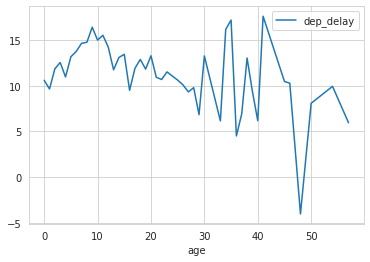

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
df_plane.groupby('age').mean('dep_delay').plot()

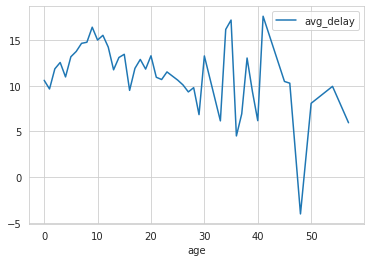

In [ ]:
pd.read_sql_query('''
SELECT AVG(f.dep_delay) AS avg_delay, 2013 - p.year AS age 
FROM flights AS f
INNER JOIN planes AS p
ON f.tailnum = p.tailnum
GROUP BY age
''', con_flight).plot(x = 'age', y = 'avg_delay')